<a href="https://colab.research.google.com/github/Luisafrodriguezo1/Diplomado2025/blob/main/1740247728_introduccion_librerias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os

In [6]:
ruta_trabajo = '/content/drive/MyDrive/diplomado/Modulo_04'
os.chdir(ruta_trabajo)
print(os.getcwd())

/content/drive/MyDrive/diplomado/Modulo_04


In [7]:


# Extrae TODO, conservando la estructura de carpetas y sobrescribiendo lo que haya:
#!unrar x -o+ "/content/drive/MyDrive/diplomado/Modulo_04/1740247728_introduccion_librerias/Recurso/Recurso.rar" /content/drive/MyDrive/diplomado/Modulo_04/1740247728_introduccion_librerias/Recurso

# Introducción librerías

## Introducción a las principales librerías: NumPy, Pandas, geopandas, rasterio y GDAL

## Caso de Uso: Exploración de la Cobertura del Suelo para 6 Municipios de Cundinamarca

El departamento de Cundinamarca requiere conocer la distribución de su cobertura del suelo para mejorar la gestión territorial y ambiental. Se busca analizar la cobertura del suelo en seis municipios mediante capas vectoriales, identificando áreas urbanas, agrícolas, bosques y cuerpos de agua.

```{admonition} Recursos
:class: nota
Capas vectoriales:
* e_cobertura_tierra_2020_muestra.shp


[<span>&#x1F4E5;</span>Recursos.rar](Recurso/Recurso.rar)


### Análisis del Problema


**Objetivo:** Analizar la distribución de la cobertura del suelo en seis municipios de Cundinamarca.

**Conceptos:**
  * Análisis estadístico: Cálculo de proporciones para interpretar la distribución de la cobertura del suelo.


**Para analizar la cobertura , utilizaremos librerías en Python, que contienen módulos con funciones  y estructuras optimizadas para tareas específicas.En particular, emplearemos las siguientes librerías: NumPy, Pandas, geopandas, rasterio y GDAL.**

```{admonition} Nota: Importar librerías en Python
:class: tip
- **`import`**: Carga una librería.  
- **`nombre_de_librería`**: Especifica la biblioteca a utilizar.  
- **`as`**: Asigna un alias opcional.  
- **`alias`**: Abreviatura como `np` (NumPy) o `pd` (Pandas).   
```

In [8]:
import numpy as np # importa NumPy con alias "np"

### NumPy

NumPy (Numerical Python) es una biblioteca de Python que proporciona estructuras de datos eficientes y funciones matemáticas  para la manipulación de arreglos multidimensionales (arrays).


<p style="text-align: left; font-size: 14px;">
    <strong> Fig.1. </strong><br>
    Logo de la biblioteca NumPy
   </p>

```{image} Imagenes/NumPy.png
:width: 300px
:align: left
:alt: numpy
```

<div style="clear: both;"></div> <p style="text-align: left; font-size: 14px;"> <strong>Nota.</strong> Tomada de NumPy Website, por NumPy Developers, s. f., <a href="https://numpy.org/">https://numpy.org/</a>. </p>




**¿Para qué sirve NumPy?**

* Manejo de arreglos y matrices: Facilita la creación, manipulación y almacenamiento de datos en estructuras eficientes.
* Operaciones matemáticas y estadísticas: Permite realizar cálculos rápidos como sumas, promedios, medianas, desviaciones estándar, etc.
* Álgebra lineal: Incluye funciones para resolver ecuaciones, descomposiciones matriciales y transformaciones lineales.
* Manejo eficiente de datos grandes: Optimiza la memoria y el procesamiento en comparación con las listas nativas de Python.
* Interoperabilidad con otras bibliotecas: Se integra con `pandas` , `SciPy`, `scikit-learn` y `TensorFlow` , entre otras.

NumPy es clave en el procesamiento de datos geoespaciales por varias razones (NumPy Developers, s. f.).:

* Procesamiento de datos raster : Los archivos raster (como imágenes satelitales y modelos de elevación) son esencialmente matrices de valores numéricos. NumPy permite su manipulación rápida, cálculo de estadísticas y aplicación de filtros.
* Bibliotecas como `rasterio` y  `GDAL`  usan NumPy internamente para manejar datos raster.

 📌 [Documentación de Numpy](https://numpy.org/)

**Ejemplo** Se simulará un raster de 4x4, donde cada píxel representa una categoría de uso del suelo según la Tabla 1.


| Nivel 1 | Nombre                          |
|---------|---------------------------------|
| 1       | Territorios Artificializados   |
| 2       | Territorios Agrícolas          |
| 3       | Bosques y Áreas Seminaturales  |
| 4       | Áreas Húmedas                  |
| 5       | Superficies de Agua            |


<p align="left" style="font-size: 12px;">
<b><strong>Tabla 1. Clasificación de Uso del Suelo - Nivel 1</strong></b>
</p>

Creación e inspección de la estructura del raster.

In [9]:
raster = np.array([
    [1, 2, 2, 3],
    [1, 3, 2, 3],
    [3, 3, 1, 1],
    [2, 3, 3, 1]
])

print("Tipo de variable: ", type(raster))
print("Cantidad de filas y  columnas: ", raster.shape)
print("Tipo de datos dentro del arreglo:",raster.dtype)
print("Número total de elementos", raster.size)




Tipo de variable:  <class 'numpy.ndarray'>
Cantidad de filas y  columnas:  (4, 4)
Tipo de datos dentro del arreglo: int64
Número total de elementos 16


Calcular la frecuencia y porcentaje de cada categoría en un raster.


In [10]:
# Contar valores únicos y frecuencia
unique, counts = np.unique(raster, return_counts=True)

print(unique, counts)

# Calcular porcentaje
porcentaje = counts / raster.size * 100
print(porcentaje)


for i in range(len(unique)):
    print("Categoría", unique[i], ":", round(porcentaje[i], 2), "%")




[1 2 3] [5 4 7]
[31.25 25.   43.75]
Categoría 1 : 31.25 %
Categoría 2 : 25.0 %
Categoría 3 : 43.75 %


Los Bosques y Áreas Seminaturales predominan en un 43.75%.

Se ejecuta las funciones para calcular la media y la desviación estándar para mostrar su funcionamiento, aunque en este caso no tiene un significado, ya que el raster es categórico.

In [11]:
media= np.mean(raster)
desviacion=np.std(raster)
print(f"Media: {media}\nDesviación estándar: {desviacion}")

Media: 2.125
Desviación estándar: 0.8569568250501305


Generar un raster binario donde los píxeles de la categoría 3 se marcan con 1, y el resto con 0.

In [12]:
bina_raster=np.where(raster==3,1,0)
print("raster binario")
print( bina_raster)
print("raster original")
print( raster)

raster binario
[[0 0 0 1]
 [0 1 0 1]
 [1 1 0 0]
 [0 1 1 0]]
raster original
[[1 2 2 3]
 [1 3 2 3]
 [3 3 1 1]
 [2 3 3 1]]


Reemplazar la categoría 2 por 88

In [13]:
raster_2=np.where(raster==2,88,raster)
print("raster modificado")
print( raster_2)



raster modificado
[[ 1 88 88  3]
 [ 1  3 88  3]
 [ 3  3  1  1]
 [88  3  3  1]]


### Pandas


<p style="text-align: left; font-size: 14px;">
  <strong>Fig. 2.</strong><br>
  Logo de la biblioteca Pandas
 </p>



```{image} Imagenes/pandas.jpg
:width: 300px
:align: left
:alt: numpy
```

<div style="clear: both;"></div>  <p style="text-align: left; font-size: 14px;"> <strong>Nota.</strong> Tomada de Codigital, s. f., <a href="https://codigital.ec/wp-content/uploads/2023/02/biblioteca_pandas.jpg" target="_blank">https://codigital.ec</a>. </p> `

Pandas es una libreria de Python que proporciona estructuras de datos y herramientas de análisis de datos. Su principal objetivo es hacer que la manipulación y el análisis de datos sean rápidos y fáciles. Pandas es especialmente útil para trabajar con datos en formato tabular, como hojas de cálculo y bases de datos. pandas_user_guide

**Características**


***Estructuras de Datos:***   
Pandas introduce dos estructuras de datos principales:

* Series: Un array unidimensional que puede contener cualquier tipo de datos (números, cadenas, etc.).
* DataFrame: Una estructura de datos bidimensional, similar a una tabla, que contiene columnas de diferentes tipos de datos.

***Funcionalidades:***

* Manipulación y limpieza de datos.
* Análisis de datos con funciones estadísticas.
* Soporte para operaciones de entrada/salida (lectura y escritura de archivos CSV, Excel, SQL, etc.).
* Agrupación y fusión de datos.

📌[Documentación de Pandas](https://pandas.pydata.org/docs/user_guide/index.html)

Ejemplo: Crear la Tabla 1 en un DataFrame de Pandas

In [14]:
import pandas as pd

#Crea un diccionario
nivel_1 = {
    'nivel 1': [1, 2, 3, 4, 5],
    'Nombre': ["Territorios Artificializados", "Territorios Agrícolas",
                "Bosques y Áreas Seminaturales","Áreas Húmedas",
                "Superficies de Agua "],

}
#Convierte el diccionario en un DataFrame de Pandas
df_nivel1 = pd.DataFrame(nivel_1)

df_nivel1

,nivel 1,Nombre
0,1,Territorios Artificializados
1,2,Territorios Agrícolas
2,3,Bosques y Áreas Seminaturales
3,4,Áreas Húmedas
4,5,Superficies de Agua


**Acceso a datos en un DataFrame**

En Pandas, se pueden seleccionar filas y columnas de un DataFrame utilizando diferentes métodos. A continuación, se presentan ejemplos prácticos:

* *Acceder a Columnas*
  
  Se extrae la columna `"Nombre"` del DataFrame para conocer las categorías de uso del suelo.

In [15]:
print(df_nivel1["Nombre"])

0     Territorios Artificializados
1            Territorios Agrícolas
2    Bosques y Áreas Seminaturales
3                    Áreas Húmedas
4             Superficies de Agua 
Name: Nombre, dtype: object


* *Acceder a Filas por Índice*

In [16]:
# Acceder a la fila con índice 2
print(df_nivel1.iloc[2])
print("-----------------")
# Acceder a las filas con índices 0 y 3
print(df_nivel1.iloc[[0, 3]])

nivel 1                                3
Nombre     Bosques y Áreas Seminaturales
Name: 2, dtype: object
-----------------
   nivel 1                        Nombre
0        1  Territorios Artificializados
3        4                 Áreas Húmedas


* *Acceder a los Primeros y Últimos Registros*

In [17]:
print("Primeras 5 filas \n")
print(df_nivel1.head())

print("Primeras 3 filas \n")
print(df_nivel1.head(3))

print("Últimas 2 filas \n ")
print(df_nivel1.tail(2))



Primeras 5 filas 

   nivel 1                         Nombre
0        1   Territorios Artificializados
1        2          Territorios Agrícolas
2        3  Bosques y Áreas Seminaturales
3        4                  Áreas Húmedas
4        5           Superficies de Agua 
Primeras 3 filas 

   nivel 1                         Nombre
0        1   Territorios Artificializados
1        2          Territorios Agrícolas
2        3  Bosques y Áreas Seminaturales
Últimas 2 filas 
 
   nivel 1                Nombre
3        4         Áreas Húmedas
4        5  Superficies de Agua 


* *Seleccionar un Rango de Filas*

In [18]:
# Acceder desde el índice 1 hasta el 3 (excluye el 4)
print(df_nivel1.iloc[1:4])

   nivel 1                         Nombre
1        2          Territorios Agrícolas
2        3  Bosques y Áreas Seminaturales
3        4                  Áreas Húmedas


*  *Seleccionar un Rango de Columnas*

In [19]:
# Todas las filas, pero solo las columnas 0 y 1
print(df_nivel1.iloc[:, 0:2])

   nivel 1                         Nombre
0        1   Territorios Artificializados
1        2          Territorios Agrícolas
2        3  Bosques y Áreas Seminaturales
3        4                  Áreas Húmedas
4        5           Superficies de Agua 


**Información General del DataFrame**

- **`type(df)`**: Devuelve el tipo de objeto, confirmando que es un `DataFrame` de Pandas.
- **`.shape`**: Retorna `(filas, columnas)`, útil para conocer el tamaño del DataFrame.  
- **`.dtypes`**:  Muestra el tipo de datos de cada columna (ejemplo: `int64`, `object`).  
- **`.columns`**:  Devuelve una lista con los nombres de las columnas.  

In [20]:
tipo=type(df_nivel1)
print("\nTipo de objeto:", tipo)

dimensiones = df_nivel1.shape
print("\nDimensiones del DataFrame:", dimensiones)


tipos_columnas = df_nivel1.dtypes
print("\nTipos de columnas:")
print(tipos_columnas)

nombres_columnas = df_nivel1.columns
print("\nNombres de columnas:", nombres_columnas)



Tipo de objeto: <class 'pandas.core.frame.DataFrame'>

Dimensiones del DataFrame: (5, 2)

Tipos de columnas:
nivel 1     int64
Nombre     object
dtype: object

Nombres de columnas: Index(['nivel 1', 'Nombre'], dtype='object')


**Filtrado de datos en un DataFrame**

* *Filtrar por valores específicos*
  
Se seleccionan únicamente los Territorios Agrícolas.

In [21]:
# Filtrar filas donde 'Nombre' es exactamente 'Territorios Agrícolas'
df_nivel1[df_nivel1['Nombre'] == 'Territorios Agrícolas']

,nivel 1,Nombre
1,2,Territorios Agrícolas


* *Filtrar por valores numéricos*  
  
Se seleccionan categorías con nivel 1 mayor que 2.


In [22]:
# Filtrar filas donde 'nivel 1' es mayor que 2
df_nivel1[df_nivel1['nivel 1'] > 2]

,nivel 1,Nombre
2,3,Bosques y Áreas Seminaturales
3,4,Áreas Húmedas
4,5,Superficies de Agua


* *Filtrar por una lista de valores*

Seleccionar los Territorios Artificializados y Bosques y Áreas Seminaturales

In [23]:
# Filtrar filas donde 'nivel 1' sea 1 o 3
df_nivel1[df_nivel1['nivel 1'].isin([1, 3])]

,nivel 1,Nombre
0,1,Territorios Artificializados
2,3,Bosques y Áreas Seminaturales


* *Excluir valores específicos*

 Se excluyen las Superficies de Agua

In [24]:
 #Filtrar filas donde 'nivel 1' no sea 5
df_nivel1[df_nivel1['nivel 1'] != 5]

,nivel 1,Nombre
0,1,Territorios Artificializados
1,2,Territorios Agrícolas
2,3,Bosques y Áreas Seminaturales
3,4,Áreas Húmedas


* *Filtrar por texto en una columna*

Se seleccionan categorías que contienen la palabra "Territorios"


In [25]:
 # Filtrar filas donde 'Nombre' contenga la palabra 'Territorios'
df_nivel1[df_nivel1['Nombre'].str.contains('Territorios')]

,nivel 1,Nombre
0,1,Territorios Artificializados
1,2,Territorios Agrícolas


**Agregar una nueva columna al DataFrame**

Se puede agregar una nueva columna asignando una lista de valores a un nombre de columna dentro del DataFrame.  

In [26]:
df_nivel1['Descripción'] = ["Artificial", "Agrícola", "Natural", "Húmeda", "Acuática"]
print("\nAgregar nueva columna 'Descripción':")
df_nivel1.tail()


Agregar nueva columna 'Descripción':


,nivel 1,Nombre,Descripción
0,1,Territorios Artificializados,Artificial
1,2,Territorios Agrícolas,Agrícola
2,3,Bosques y Áreas Seminaturales,Natural
3,4,Áreas Húmedas,Húmeda
4,5,Superficies de Agua,Acuática


**Renombrar una columna en el DataFrame**  

Se puede cambiar el nombre de una columna usando `rename()`.  

In [27]:
df_nivel1.rename(columns={'Nombre': 'Nombre Cobertura'}, inplace=True)
#inplace=True:Modifica el DataFrame original sin necesidad de reasignarlo.

In [28]:
df_nivel1['nivel 1'] = df_nivel1['nivel 1'].astype(str)

**Guardar un DataFrame**

Pandas permite exportar DataFrames a varios formatos para su almacenamiento como CSV,Excel,JSON, entre otros.

In [29]:
df_nivel1.to_csv("1740247728_introduccion_librerias/Recurso/nivel1.csv", index=False)

### GeoPandas

GeoPandas es una extensión de la biblioteca Pandas diseñada para trabajar con datos geoespaciales. Combina la facilidad de uso de Pandas con funcionalidades adicionales para el manejo de datos geográficos. GeoPandas permite realizar análisis espaciales y visualizar datos en mapas de manera intuitiva.

<p style="text-align: left; font-size: 14px;">
  <strong>Fig. 3.</strong><br>
  Logo de la biblioteca GeoPandas
</p>


```{image} Imagenes/GeoPandas.png
:width: 300px
:align: left
:alt:
```

<div style="clear: both;"></div> <p style="text-align: left; font-size: 14px;"> <strong>Nota.</strong> Tomada de MappingGIS, s. f., <a href="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJ7fVf_iddqR8gXM_5NwQLhNN6uIlQMFvK1A&s" target="_blank"> https://encrypted-tbn0.gstatic.com/... </a>. </p>


**Características**  
* **Geometrías:** GeoPandas permite almacenar y manipular geometrías como puntos, líneas y polígonos, utilizando la clase GeoSeries.
* **Operaciones Espaciales:** Puedes realizar operaciones como intersección, unión y diferencia sobre los datos geográficos.
* **Visualización:** Integración con bibliotecas de visualización como Matplotlib para crear mapas y visualizaciones espaciales.

 📌 [Documentación Geopandas](https://geopandas.org/en/stable/docs/user_guide.html)

**Para analizar la cobertura del suelo municipios de Cundinamarca, utilizaremos *GeoPandas* para cargar y manipular datos vectoriales. El archivo contiene información, como la categoría de cobertura, niveles de clasificación, área en hectáreas y geometría de cada unidad espacial.**

In [30]:
import geopandas as gpd
import pandas as pd
# Configurar Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [31]:
# Ruta del  shapefile
ruta_shapefile = r'1740247728_introduccion_librerias/Recurso/e_cobertura_tierra_2020_muestra.shp'
# Leer shapefile
gdf = gpd.read_file(ruta_shapefile)
gdf.head()

,OBJECTID,codigo,leyenda,insumo,apoyo,confiabili,cambio,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,area_ha,nom_dpto,nom_mpio,Cod_dane_m,Categoria,Cod_dane_d,cod_aa,nom_aa,SHAPE_Leng,SHAPE_Area,geometry
0,95161.0,321113,3.2.1.1.1.3. Herbazal denso de tierra firme c...,Landsat_2020_Mediana_07042021,Sentinel2_NXL_20200205,SI,1,3,32,321,3211,32111,321113,27.544097,Cundinamarca,Chocontá,25183,1,25,CAR,CORPORACION AUTONOMA REGIONAL DE CUNDINAMARCA,0.033434,0.000022,"MULTIPOLYGON (((-73.54992 5.139, -73.55056 5.1..."
1,95170.0,244,2.4.4. Mosaico de pastos con espacios naturales,Landsat_2020_Mediana_07042021,Sentinel2_NYJ_20200210,SI,1,2,24,244,None,None,None,6.273704,Cundinamarca,Chocontá,25183,1,25,CAR,CORPORACION AUTONOMA REGIONAL DE CUNDINAMARCA,0.022559,0.000005,"MULTIPOLYGON (((-73.5407 5.12042, -73.5407 5.1..."
2,95172.0,3222,3.2.2.2. Arbustal abierto,Landsat_2020_mediana_07042021,None,SI,1,3,32,322,3222,None,None,32.429278,Cundinamarca,Suesca,25772,1,25,CAR,CORPORACION AUTONOMA REGIONAL DE CUNDINAMARCA,0.051244,0.000026,"POLYGON ((-73.83299 5.1312, -73.83313 5.1311, ..."
3,95173.0,231,2.3.1. Pastos limpios,Landsat_2020_mediana_07042021,None,SI,1,2,23,231,None,None,None,36.739421,Cundinamarca,Suesca,25772,1,25,CAR,CORPORACION AUTONOMA REGIONAL DE CUNDINAMARCA,0.067093,0.000030,"MULTIPOLYGON (((-73.84454 5.07294, -73.84483 5..."
4,95174.0,225,2.2.5. Cultivos confinados,Landsat_2020_mediana_07042021,None,SI,1,2,22,225,None,None,None,27.641835,Cundinamarca,Suesca,25772,1,25,CAR,CORPORACION AUTONOMA REGIONAL DE CUNDINAMARCA,0.023015,0.000023,"POLYGON ((-73.83744 5.04973, -73.83858 5.04805..."


Verificar el sistema de coordenadas de referencia de la capa vectorial.

In [32]:
gdf.crs

<Geographic 2D CRS: EPSG:4686>
Name: MAGNA-SIRGAS
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Se inspecciona la estructura de la capa vectorial para obtener registros, nombres de columnas, tipos de datos y valores nulos.

In [33]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    744 non-null    float64 
 1   codigo      744 non-null    int64   
 2   leyenda     744 non-null    object  
 3   insumo      744 non-null    object  
 4   apoyo       133 non-null    object  
 5   confiabili  744 non-null    object  
 6   cambio      744 non-null    int64   
 7   nivel_1     744 non-null    object  
 8   nivel_2     744 non-null    object  
 9   nivel_3     744 non-null    object  
 10  nivel_4     351 non-null    object  
 11  nivel_5     138 non-null    object  
 12  nivel_6     117 non-null    object  
 13  area_ha     744 non-null    float64 
 14  nom_dpto    744 non-null    object  
 15  nom_mpio    744 non-null    object  
 16  Cod_dane_m  744 non-null    object  
 17  Categoria   744 non-null    object  
 18  Cod_dane_d  744 non-null    object  
 19  

La capa vectorial contiene **744 registros** y **24 columnas**. La mayoría de los campos están completos, excepto **`apoyo`**, **`nivel_4`**, **`nivel_5`** y **`nivel_6`**, que presentan valores nulos. Además, la columna **`geometry`** confirma que se trata de un **GeoDataFrame**.

Se identifican los atributos disponibles en la capa vectorial

In [34]:
gdf.columns

Index(['OBJECTID', 'codigo', 'leyenda', 'insumo', 'apoyo', 'confiabili',
       'cambio', 'nivel_1', 'nivel_2', 'nivel_3', 'nivel_4', 'nivel_5',
       'nivel_6', 'area_ha', 'nom_dpto', 'nom_mpio', 'Cod_dane_m', 'Categoria',
       'Cod_dane_d', 'cod_aa', 'nom_aa', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')

Se determinan los municipios de Cundinamarca que serán incluidos en el análisis, obteniendo una lista de valores únicos de la columna correspondiente en la capa vectorial.

In [35]:
gdf['nom_mpio'].unique()

array(['Chocontá', 'Suesca', 'Tocancipá', 'Guatavita', 'Gachancipá',
       'Sesquilé'], dtype=object)

 Se genera un mapa  para visualizar la distribución de los diferentes tipos de cobertura asociados a la  clase 1 en los municipios seleccionados. Utilizando la librería *Matplotlib* para la configuración de la figura.

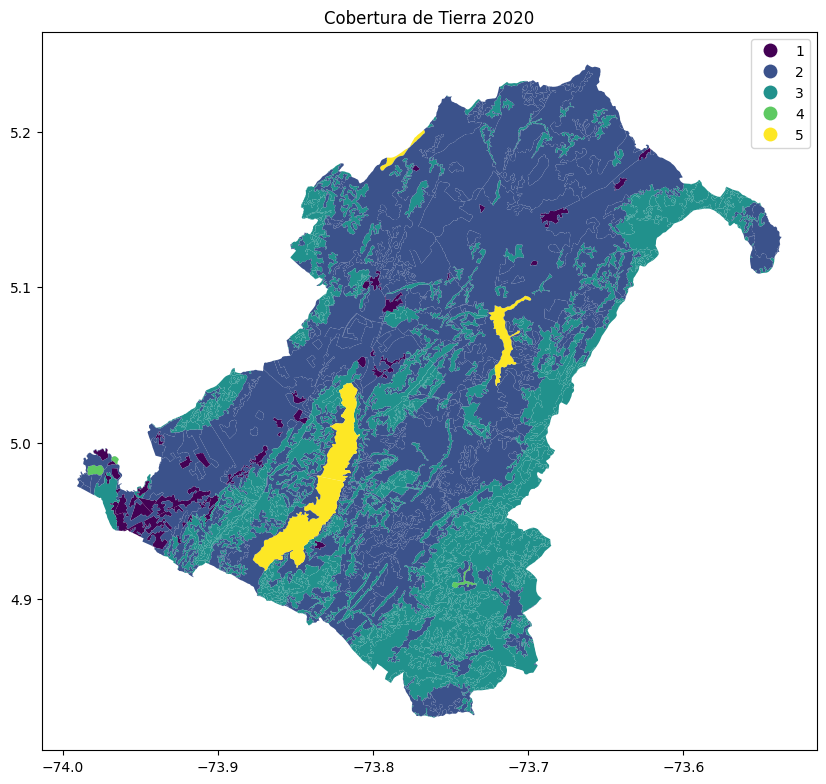

In [36]:
import matplotlib.pyplot as plt

# Crear una figura y un eje con un tamaño de 10x10 pulgadas
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Dibujar los polígonos de la capa vectorial
# Se utiliza la columna 'nivel_1' para asignar colores a las coberturas
# cmap='viridis' define la escala de colores
# legend=True activa la leyenda para identificar cada categoría
gdf.plot(column='nivel_1', cmap='viridis', ax=ax, legend=True)

# Agregar título y etiquetas a los ejes
plt.title("Cobertura de Tierra 2020")  # Título del gráfico


# Mostrar el gráfico con la leyenda
plt.show()


Para **complementar** la información de la capa vectorial con una descripción más sencilla de la cobertura del suelo, se integrará la tabla `df_nivel1`, que contiene los nombres asociados a cada categoría de `nivel_1`.


In [37]:
gdf = gdf.merge(df_nivel1[['nivel 1', 'Nombre Cobertura']], left_on='nivel_1', right_on='nivel 1', how='left').drop(columns=['nivel 1'])


In [38]:
gdf[['Nombre Cobertura','nivel_1']].tail()

,Nombre Cobertura,nivel_1
739,Territorios Agrícolas,2
740,Territorios Agrícolas,2
741,Superficies de Agua,5
742,Bosques y Áreas Seminaturales,3
743,Territorios Agrícolas,2


**Distribución de coberturas**

Contar la cantidad de polígonos por tipo de cobertura por nivel_1

In [39]:
gdf['nivel_1'].value_counts()

,count
nivel_1,
3,393
2,285
1,59
5,4
4,3


**Área total por tipo de cobertura**

In [40]:
gdf.groupby(['nivel_1','Nombre Cobertura'])['area_ha'].sum()

,,area_ha
nivel_1,Nombre Cobertura,
1,Territorios Artificializados,2061.068656
2,Territorios Agrícolas,61005.288476
3,Bosques y Áreas Seminaturales,32072.248754
4,Áreas Húmedas,146.915576
5,Superficies de Agua,2881.836326


**Cobertura del suelo por municipio.**

In [41]:
cober_mun = gdf.groupby(['nom_mpio', 'nivel_1', 'Nombre Cobertura'], as_index=False)['area_ha'].sum()
cober_mun

,nom_mpio,nivel_1,Nombre Cobertura,area_ha
0,Chocontá,1,Territorios Artificializados,214.876612
1,Chocontá,2,Territorios Agrícolas,21967.692142
2,Chocontá,3,Bosques y Áreas Seminaturales,7339.816133
3,Chocontá,5,Superficies de Agua,443.215482
4,Gachancipá,1,Territorios Artificializados,205.793791
5,Gachancipá,2,Territorios Agrícolas,2974.292596
6,Gachancipá,3,Bosques y Áreas Seminaturales,1106.457681
7,Guatavita,1,Territorios Artificializados,27.949839
8,Guatavita,2,Territorios Agrícolas,9651.122966
9,Guatavita,3,Bosques y Áreas Seminaturales,14031.891123


**Cobertura dominante en cada municipio según área total**

In [42]:
max_cober_mun = cober_mun.loc[cober_mun.groupby('nom_mpio')['area_ha'].idxmax()]

print(max_cober_mun)

      nom_mpio nivel_1               Nombre Cobertura       area_ha
1     Chocontá       2          Territorios Agrícolas  21967.692142
5   Gachancipá       2          Territorios Agrícolas   2974.292596
9    Guatavita       3  Bosques y Áreas Seminaturales  14031.891123
13    Sesquilé       2          Territorios Agrícolas   8591.815112
17      Suesca       2          Territorios Agrícolas  13553.587787
21   Tocancipá       2          Territorios Agrícolas   4266.777873


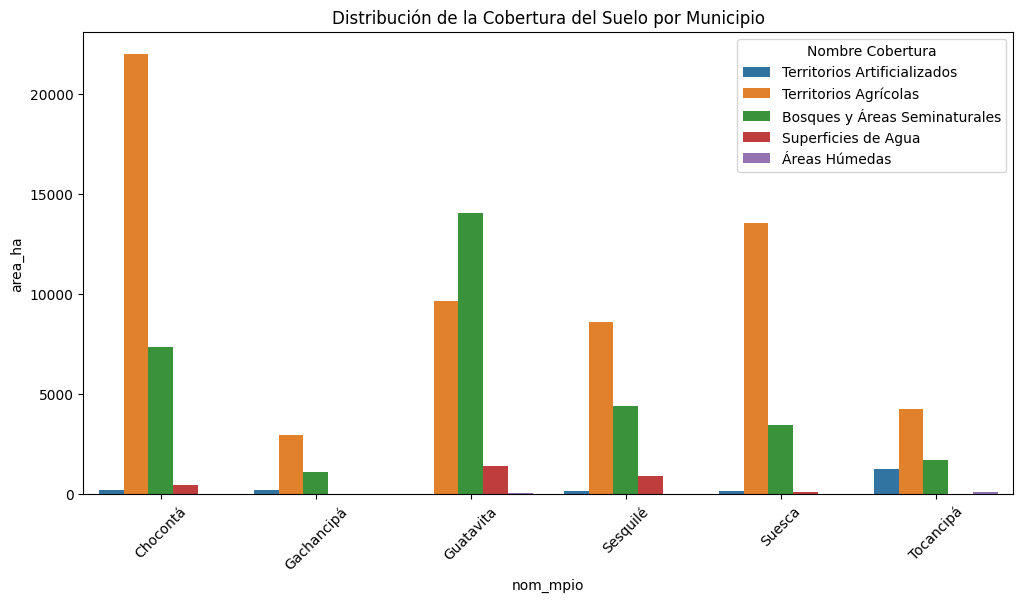

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=cober_mun, x='nom_mpio', y='area_ha', hue='Nombre Cobertura')
plt.xticks(rotation=45)
plt.title("Distribución de la Cobertura del Suelo por Municipio")
plt.show()

### Análisis de Resultados

Los municipios estudiados revela que los Territorios Agrícolas son la categoría predominante, con una extensión total de aproximadamente 61,005 ha, lo que indica un fuerte uso del suelo para actividades agropecuarias.

Por otro lado, Guatavita se diferencia con una mayor proporción de Bosques y Áreas Seminaturales (14,031 ha), posiblemente asociados a áreas protegidas o reservas.

## Caso de Uso: Análisis del Uso del Suelo en Zonas de Influencia de Embalses en Cundinamarca

En Cundinamarca, los embalses juegan un papel fundamental en el abastecimiento de agua, la generación de energía y la regulación hídrica. Sin embargo, las actividades humanas cercanas pueden afectar su calidad y sostenibilidad.

**Objetivo:** Encontrar relación entre los embalses y las coberturas del suelo circundantes, identificando el tipo de actividades presentes en un radio determinadoalrededor de cada embalse.

**Conceptos:**
  * Procesamiento Geoespacial

```{admonition} Recursos
:class: nota
- Capa vectorial: embalse.shp

[<span>&#x1F4E5;</span>Recursos.rar](Recurso/Recurso.rar)

In [44]:
#cd "C:\Users\pc\Documents\codigos\Igac2025\Diplomado\book_diplomado\modulo_0\17400010441_introduccion_librerias"

In [45]:
ruta_embalse=r"1740247728_introduccion_librerias/Recurso/embalse.shp"
gpd_embalse=gpd.read_file(ruta_embalse)
gpd_embalse

,OBJECTID,NOMBRE_GEO,PROYECTO,SYMBOL,FECHA,RULEID,FECHA_1,PK_CUE,GLOBALID,SHAPE_Leng,SHAPE_Area,geometry
0,73,Represa de Tibito,None,3,NaT,1,NaT,632017.0,{916633B9-4BE8-4E0E-8B22-291883DB2322},2125.294586,2.662428e+05,"POLYGON ((-73.96497 4.97716, -73.96524 4.97688..."
1,74,Embalse de Tomine,None,3,NaT,1,NaT,632019.0,{7F175E3C-0607-4584-803E-6C7864035D74},51959.729375,3.070053e+07,"MULTIPOLYGON (((-73.84805 4.95788, -73.84805 4..."
2,75,Emblase del Sisga,None,3,NaT,1,NaT,632021.0,{25313A3A-865C-4949-8F94-BA1353FCD448},24283.823664,5.571582e+06,"POLYGON ((-73.69592 5.0921, -73.69587 5.09208,..."



```{admonition} Actividad
:class: important
 - Verifica el sistema de referencia espacial (CRS).
 - Verifica los nombres de las columnas y sus tipos de datos.
 - ¿Qué embalses se encuntran en el area de estudio?
```

<Axes: >

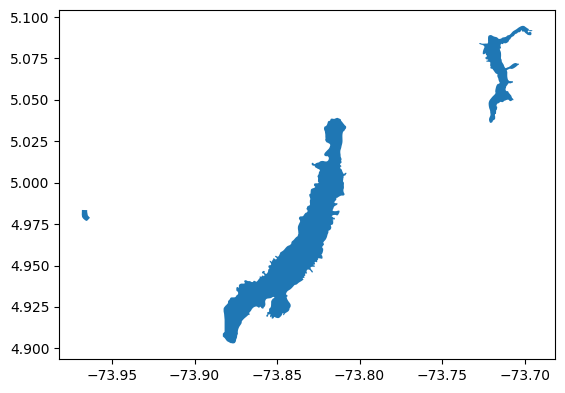

In [46]:
gpd_embalse.plot()

Se visualiza de las capas geográficas. Se representará la cobertura del suelo como capa base y, sobre ella, se superpondrán los embalses

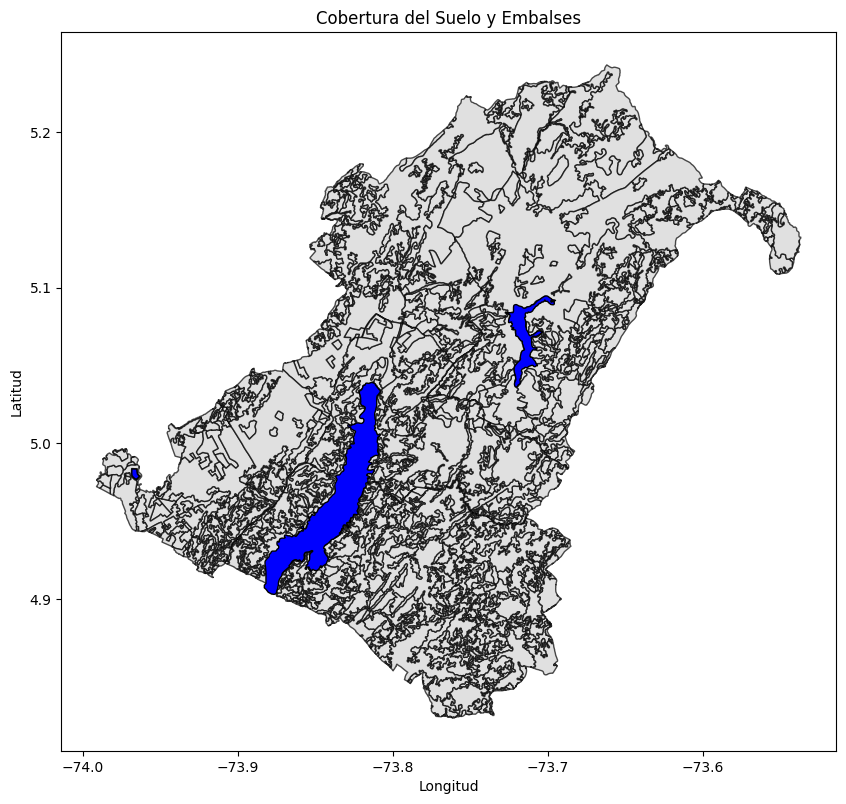

In [47]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar la capa base
gdf.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.7)

# Dibujar la capa de embalses
gpd_embalse.plot(ax=ax, color="blue", edgecolor="black", markersize=50)

# Agregar título y etiquetas
plt.title("Cobertura del Suelo y Embalses")
plt.xlabel("Longitud")
plt.ylabel("Latitud")

# Mostrar el gráfico
plt.show()

```{admonition} Nota
:class: tip
GeoPandas calcula el área de los polígonos utilizando las unidades del sistema de referencia espacial (CRS) de la capa.   
```


**Área, perímetro y centroide.**

Para analizar la capa de embalses, calcularemos tres propiedades espaciales fundamentales:

* Área: Representa la superficie ocupada por cada embalse, expresada en hectáreas (ha).
* Perímetro : Longitud del contorno de cada embalse, medida en metros (m).
* Centroide: Punto central de cada embalse en coordenadas geográficas, útil para su localización y análisis espacial.


In [48]:
#Calcular área

gpd_embalse["area_m2"] = gpd_embalse.geometry.area
# Convertir a hectáreas
gpd_embalse["area_ha"] = gpd_embalse["area_m2"] / 10_000

# Calcular el perímetro en metros
gpd_embalse["perimetro_m"] = gpd_embalse.geometry.length

# Calcular centroides
gpd_embalse["centroide"] = gpd_embalse.geometry.centroid

gpd_embalse[["NOMBRE_GEO","area_m2","perimetro_m","centroide"]]

/tmp/ipython-input-48-2783894724.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gpd_embalse["area_m2"] = gpd_embalse.geometry.area
/tmp/ipython-input-48-2783894724.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gpd_embalse["perimetro_m"] = gpd_embalse.geometry.length
/tmp/ipython-input-48-2783894724.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gpd_embalse["centroide"] = gpd_embalse.geometry.centroid


,NOMBRE_GEO,area_m2,perimetro_m,centroide
0,Represa de Tibito,0.000022,0.019209,POINT (-73.96625 4.98035)
1,Embalse de Tomine,0.002507,0.469613,POINT (-73.83911 4.9633)
2,Emblase del Sisga,0.000455,0.219439,POINT (-73.71501 5.06878)


**Función geoespacial Buffer**

Un buffer geoespacial genera un polígono alrededor de un objeto geográfico para analizar su entorno y relación con otros elementos cercanos.

<p style="text-align: left; font-size: 14px;">
    <strong> Fig.4. </strong><br>
    Ejemplo de buffer
</p>

```{image} Imagenes/buffer.png
:width: 500px
:align: left
:alt: biffer
```
<div style="clear: both;"></div> <p style="text-align: left; font-size: 14px;"> <strong>Nota.</strong> Tomada de GISCrack, s. f., <a href="https://giscrack.com/tag/buffer/" target="_blank">https://giscrack.com/tag/buffer/</a>. </p>

Usaremos un buffer de mas o menos de 1 km alrededor de cada embalse para analizar la relación con las coberturas del suelo cercanas.

In [49]:
gpd_embalse["buffer_1km"] = gpd_embalse.geometry.buffer(0.009)
gpd_embalse

/tmp/ipython-input-49-1728702709.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gpd_embalse["buffer_1km"] = gpd_embalse.geometry.buffer(0.009)


,OBJECTID,NOMBRE_GEO,PROYECTO,SYMBOL,FECHA,RULEID,FECHA_1,PK_CUE,GLOBALID,SHAPE_Leng,SHAPE_Area,geometry,area_m2,area_ha,perimetro_m,centroide,buffer_1km
0,73,Represa de Tibito,None,3,NaT,1,NaT,632017.0,{916633B9-4BE8-4E0E-8B22-291883DB2322},2125.294586,2.662428e+05,"POLYGON ((-73.96497 4.97716, -73.96524 4.97688...",0.000022,2.173818e-09,0.019209,POINT (-73.96625 4.98035),"POLYGON ((-73.95853 4.97087, -73.9588 4.97059,..."
1,74,Embalse de Tomine,None,3,NaT,1,NaT,632019.0,{7F175E3C-0607-4584-803E-6C7864035D74},51959.729375,3.070053e+07,"MULTIPOLYGON (((-73.84805 4.95788, -73.84805 4...",0.002507,2.506745e-07,0.469613,POINT (-73.83911 4.9633),"POLYGON ((-73.89081 4.91306, -73.89081 4.91317..."
2,75,Emblase del Sisga,None,3,NaT,1,NaT,632021.0,{25313A3A-865C-4949-8F94-BA1353FCD448},24283.823664,5.571582e+06,"POLYGON ((-73.69592 5.0921, -73.69587 5.09208,...",0.000455,4.550219e-08,0.219439,POINT (-73.71501 5.06878),"POLYGON ((-73.73436 5.078, -73.73481 5.07855, ..."


In [50]:
# Establecer como geometría activa
gpd_buffer= gpd_embalse.set_geometry("buffer_1km")
gpd_buffer

,OBJECTID,NOMBRE_GEO,PROYECTO,SYMBOL,FECHA,RULEID,FECHA_1,PK_CUE,GLOBALID,SHAPE_Leng,SHAPE_Area,geometry,area_m2,area_ha,perimetro_m,centroide,buffer_1km
0,73,Represa de Tibito,None,3,NaT,1,NaT,632017.0,{916633B9-4BE8-4E0E-8B22-291883DB2322},2125.294586,2.662428e+05,"POLYGON ((-73.96497 4.97716, -73.96524 4.97688...",0.000022,2.173818e-09,0.019209,POINT (-73.96625 4.98035),"POLYGON ((-73.95853 4.97087, -73.9588 4.97059,..."
1,74,Embalse de Tomine,None,3,NaT,1,NaT,632019.0,{7F175E3C-0607-4584-803E-6C7864035D74},51959.729375,3.070053e+07,"MULTIPOLYGON (((-73.84805 4.95788, -73.84805 4...",0.002507,2.506745e-07,0.469613,POINT (-73.83911 4.9633),"POLYGON ((-73.89081 4.91306, -73.89081 4.91317..."
2,75,Emblase del Sisga,None,3,NaT,1,NaT,632021.0,{25313A3A-865C-4949-8F94-BA1353FCD448},24283.823664,5.571582e+06,"POLYGON ((-73.69592 5.0921, -73.69587 5.09208,...",0.000455,4.550219e-08,0.219439,POINT (-73.71501 5.06878),"POLYGON ((-73.73436 5.078, -73.73481 5.07855, ..."


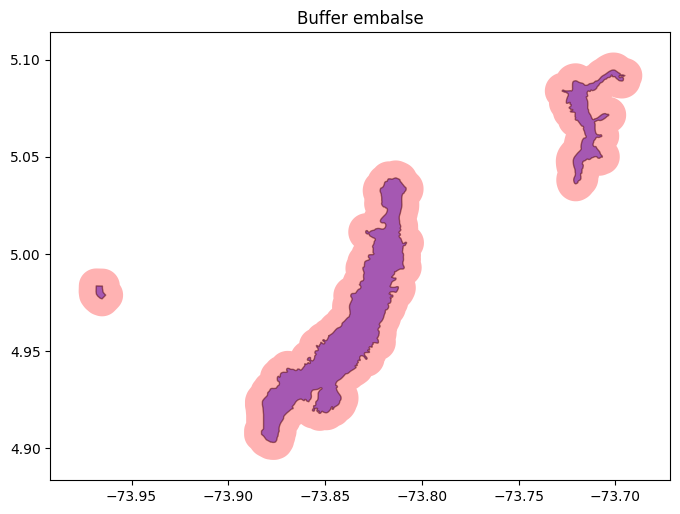

In [51]:
fig, ax = plt.subplots(figsize=(8, 8))
gpd_embalse.plot(ax=ax, color='blue', edgecolor='k', alpha=0.5, label="Embalses")
gpd_buffer.plot(ax=ax, color='red', alpha=0.3, label="Buffer 3km")

plt.title("Buffer embalse")
plt.show()


**Función geoespacial Overlayr**

`overlay` combina dos capas vectoriales mediante operaciones espaciales, como intersección, unión, diferencia y diferencia simetría, para analizar la relación entre objetos geográficos.

<p style="text-align: left; font-size: 14px;">
    <strong> Fig.5. </strong><br>
    Métodos de superposición espacial
</p>


```{image} Imagenes/overlay.png
:width: 500px
:align: center
:alt: biffer
```
<div style="clear: both;"></div> <p style="text-align: left; font-size: 14px;"> <strong>Nota.</strong> Tomada de PythonGis, s. f., <a href="https://pythongis.org/part2/chapter-06/nb/08-overlay-analysis-with-vector-data.html" target="_blank"> https://pythongis.org/part2/chapter-06/nb/08-overlay-analysis-with-vector-data.html</a>. </p>

Para identificar las coberturas del suelo dentro del área de influencia de los embalses, aplicamos la operación overlay, que nos permite extraer los polígonos de cobertura que intersectan con el buffer.

In [52]:
gpd_buffer.columns
selec_column = ['OBJECTID', 'NOMBRE_GEO', 'geometry', 'buffer_1km',
                   'area_m2', 'centroide']
gpd_buffer = gpd_buffer[selec_column]
gpd_buffer.head()

,OBJECTID,NOMBRE_GEO,geometry,buffer_1km,area_m2,centroide
0,73,Represa de Tibito,"POLYGON ((-73.96497 4.97716, -73.96524 4.97688...","POLYGON ((-73.95853 4.97087, -73.9588 4.97059,...",0.000022,POINT (-73.96625 4.98035)
1,74,Embalse de Tomine,"MULTIPOLYGON (((-73.84805 4.95788, -73.84805 4...","POLYGON ((-73.89081 4.91306, -73.89081 4.91317...",0.002507,POINT (-73.83911 4.9633)
2,75,Emblase del Sisga,"POLYGON ((-73.69592 5.0921, -73.69587 5.09208,...","POLYGON ((-73.73436 5.078, -73.73481 5.07855, ...",0.000455,POINT (-73.71501 5.06878)


In [53]:
gdf_inter = gpd.overlay(gdf, gpd_buffer, how="intersection")
gdf_inter.head(2)


,OBJECTID_1,codigo,leyenda,insumo,apoyo,confiabili,cambio,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,area_ha,nom_dpto,nom_mpio,Cod_dane_m,Categoria,Cod_dane_d,cod_aa,nom_aa,SHAPE_Leng,SHAPE_Area,Nombre Cobertura,OBJECTID_2,NOMBRE_GEO,geometry,area_m2,centroide
0,95450.0,3221,3.2.2.1. Arbustal denso,Landsat_2020_mediana_07042021,None,SI,1,3,32,322,3221,None,None,211.750134,Cundinamarca,Chocontá,25183,1,25,CAR,CORPORACION AUTONOMA REGIONAL DE CUNDINAMARCA,0.135790,0.000173,Bosques y Áreas Seminaturales,75,Emblase del Sisga,"POLYGON ((-73.6979 5.05024, -73.69801 5.0506, ...",0.000455,POINT (-73.71501 5.06878)
1,95469.0,243,"2.4.3. Mosaico de cultivos, pastos y espacios ...",Landsat_2020_mediana_07042021,None,SI,1,2,24,243,None,None,None,135.046251,Cundinamarca,Chocontá,25183,1,25,CAR,CORPORACION AUTONOMA REGIONAL DE CUNDINAMARCA,0.082628,0.000110,Territorios Agrícolas,75,Emblase del Sisga,"MULTIPOLYGON (((-73.72748 5.06342, -73.72743 5...",0.000455,POINT (-73.71501 5.06878)


```{admonition} Nota
:class: tip
 - Después de realizar la operación de `overlay`, es necesario recalcular las áreas, ya que las geometrías resultantes pueden haberse modificado debido a la intersección entre las capas.
```

In [54]:
gdf_inter["area_m2"] = gdf_inter.geometry.area

/tmp/ipython-input-54-2820313969.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_inter["area_m2"] = gdf_inter.geometry.area


In [55]:
gdf_inter.groupby(['NOMBRE_GEO', 'nivel_1', 'Nombre Cobertura'])['area_m2'].sum()

NOMBRE_GEO         nivel_1  Nombre Cobertura             
Embalse de Tomine  1        Territorios Artificializados     0.000023
                   2        Territorios Agrícolas            0.002303
                   3        Bosques y Áreas Seminaturales    0.001703
                   5        Superficies de Agua              0.001916
Emblase del Sisga  2        Territorios Agrícolas            0.001791
                   3        Bosques y Áreas Seminaturales    0.000262
                   5        Superficies de Agua              0.000362
Represa de Tibito  1        Territorios Artificializados     0.000061
                   2        Territorios Agrícolas            0.000117
                   3        Bosques y Áreas Seminaturales    0.000067
                   4        Áreas Húmedas                    0.000035
Name: area_m2, dtype: float64

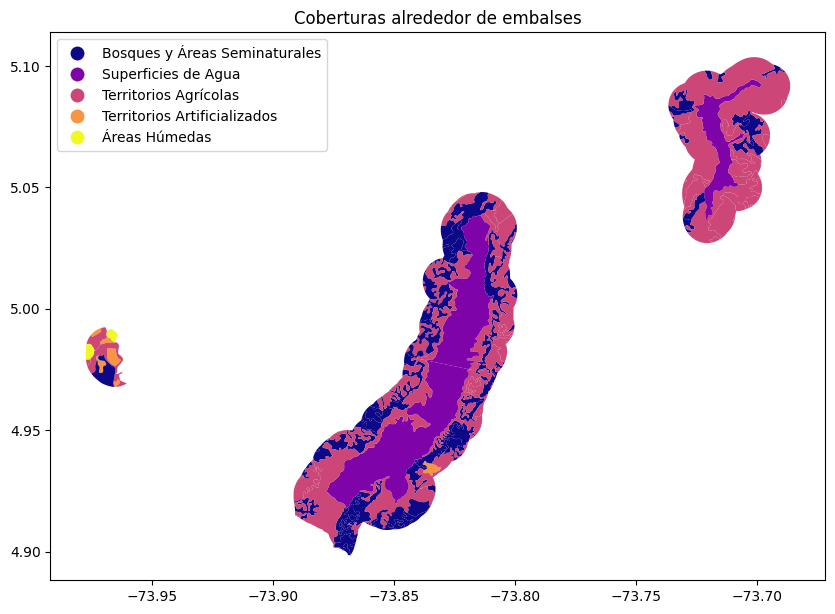

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

gdf_inter.plot(column='Nombre Cobertura', cmap='plasma', ax=ax, legend=True,legend_kwds={'loc': 'upper left'})

plt.title("Coberturas alrededor de embalses")  # Título del gráfico
plt.show()

Ahora guardaremos en un shapefile (`.shp`) las zonas de interés usando GeoPandas, conservando su geometría y atributos.

In [57]:
print(gdf_inter.dtypes)

OBJECTID_1           float64
codigo                 int64
leyenda               object
insumo                object
apoyo                 object
confiabili            object
cambio                 int64
nivel_1               object
nivel_2               object
nivel_3               object
nivel_4               object
nivel_5               object
nivel_6               object
area_ha              float64
nom_dpto              object
nom_mpio              object
Cod_dane_m            object
Categoria             object
Cod_dane_d            object
cod_aa                object
nom_aa                object
SHAPE_Leng           float64
SHAPE_Area           float64
Nombre Cobertura      object
OBJECTID_2             int64
NOMBRE_GEO            object
geometry            geometry
area_m2              float64
centroide           geometry
dtype: object


In [58]:
# Lista de columnas a mantener
columnas_seleccionadas = [
    "nivel_1",  "geometry"
]

gdf_filtrado = gdf_inter[columnas_seleccionadas]

In [59]:
# Ruta del shapefile.
ruta_shape= r"1740247728_introduccion_librerias/Recurso/zonadeinteres.shp"
#Guardar en tipo shapefile.
gdf_filtrado.to_file(ruta_shape, driver="ESRI Shapefile")


```{admonition} Nota
:class: tip
 **Formatos Soportados en GeoPandas**

Si se desea guardar los datos en diferentes formatos, es necesario cambiar el **driver** correspondiente:

| **Formato**            | **Driver en GeoPandas**  | **Extensión del archivo** |
|------------------------|------------------------|---------------------------|
| Shapefile (ESRI)      | `"ESRI Shapefile"`      | `.shp`                    |
| GeoJSON               | `"GeoJSON"`             | `.geojson`                 |
| KML (Google Earth)    | `"KML"`                 | `.kml`                     |
| GPKG (GeoPackage)     | `"GPKG"`                | `.gpkg`                    |
| CSV con WKT           | `"CSV"`                 | `.csv`                     |
| Parquet               | `"Parquet"`             | `.parquet`                 |
| Feather               | `"Feather"`             | `.feather`                 |
```

## Gdal

GDAL (Geospatial Data Abstraction Library) es una librería  para el manejo de datos geoespaciales en formatos ráster y vectorial.

<p style="text-align: left; font-size: 14px;">
    <strong> Fig.6. </strong><br>
    Imagen del proyecto GDAL
</p>

```{image} Imagenes/gdal.png
:width: 300px
:align: left
:alt: numpy
```

<div style="clear: both;"></div> <p style="text-align: left; font-size: 14px;"> <strong>Nota.</strong> Tomada de OSGeo Website, s. f., <a href="https://www.osgeo.org/projects/gdal/" target="_blank"> https://www.osgeo.org/projects/gdal/</a>. </p>



***Funcionalidades:***

- *Procesamiento de Ráster*: Permite leer, escribir, reproyectar, recortar, cambiar la resolución y aplicar operaciones matemáticas sobre imágenes geoespaciales.

- *Procesamiento de Datos Vectoriales*: Facilita la conversión de formatos, edición de geometrías y transformación de coordenadas en archivos como Shapefile, GeoJSON y bases de datos espaciales.
  
 - *Análisis Espacial y Estadístico*: Extrae estadísticas zonales, genera máscaras, realiza interpolaciones y facilita el análisis de la relación entre datos vectoriales y ráster.


 📌 [Documentación Gdal](https://gdal.org/en/stable/)

### Rasterizar la Capa de Cobertura en Embalses

Rasterizar una capa de cobertura del suelo alrededor de embalses permite convertir datos vectoriales en una estructura matricial, facilitando su integración con imágenes satelitales

 * Se  cargar un Shapefile con GDAL, rasterizarlo utilizando los valores de la columna nivel_1 y guardar el resultado en un archivo GeoTIFF.

In [60]:
from osgeo import gdal, ogr, osr

Las librerías importadas desde OSGeo (`gdal`, `ogr`, `osr`) pertenecen a la GDAL/OGR.

| Librería | Función Principal | Tipos de Datos |
|----------|------------------|---------------|
| `gdal`   | Manipulación de datos ráster | TIFF, PNG, JPEG, ASC |
| `ogr`    | Manipulación de datos vectoriales | Shapefile, GeoJSON, KML |
| `osr`    | Manejo de sistemas de coordenadas | EPSG, WKT, PROJ |




In [61]:
#Ruta shapefile y raster de salida
ruta_shape = r"1740247728_introduccion_librerias/Recurso/zonadeinteres.shp"
ruta_raster = r"1740247728_introduccion_librerias/Recurso/zonadeinteres_raster.tif"

* Cargar el Shapefile con OGR.

In [62]:
#
shapefile = ogr.Open(ruta_shape)
zona_int = shapefile.GetLayer()
print(zona_int.GetSpatialRef())


GEOGCS["MAGNA-SIRGAS",
    DATUM["Marco_Geocentrico_Nacional_de_Referencia",
        SPHEROID["GRS 1980",6378137,298.257222101,
            AUTHORITY["EPSG","7019"]],
        AUTHORITY["EPSG","6686"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AXIS["Latitude",NORTH],
    AXIS["Longitude",EAST],
    AUTHORITY["EPSG","4686"]]


/usr/local/lib/python3.11/dist-packages/osgeo/ogr.py:593: FutureWarning: Neither ogr.UseExceptions() nor ogr.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


* Obtener la extensión del shapefile.

In [63]:
ext_min_x, ext_max_x, ext_min_y, ext_max_y = zona_int.GetExtent()
print(ext_min_x, ext_max_x, ext_min_y, ext_max_y)

-73.9773426185068 -73.68611999559816 4.898508574000061 5.103664821674556


* Cálcular el número de filas, columnas y definir el tamaño de la matriz de píxeles.

In [64]:
pix_size = 1 / 111320  # Convertir 1m a grados (aproximado)
cols = int((ext_max_x - ext_min_x) / pix_size)
rows = int((ext_max_y - ext_min_y) / pix_size)

print(f"Tamaño del píxel en grados: {pix_size}")
print(f"Dimensiones del raster: {cols} x {rows}")

Tamaño del píxel en grados: 8.98311174991017e-06
Dimensiones del raster: 32418 x 22837


* Crear el raster de salida.

In [65]:
driver = gdal.GetDriverByName("GTiff")
raster = driver.Create(ruta_raster, cols, rows, 1, gdal.GDT_Byte)
#gdal.GDT_Byte Entero sin signo de 8 bits (0-255)

* Definir la proyección del raster

In [66]:
sr = zona_int.GetSpatialRef()
raster.SetGeoTransform((ext_min_x, pix_size, 0, ext_max_y, 0, -pix_size))
raster.SetProjection(sr.ExportToWkt())

0

* Rasterizar usando la columna `"nivel_1"`

In [67]:
gdal.RasterizeLayer(raster, [1], zona_int, options=["ATTRIBUTE=nivel_1"])

0

* Cerrar y guardar el raster

In [68]:
raster.FlushCache()
raster = None

### Rasterio

Rasterio es una librería optimizada para el manejo de datos geoespaciales en formato raster. Permite trabajar con imágenes satelitales, modelos de elevación digital (DEM) y cualquier otro dato en estructura matricial georreferenciada.

<p style="text-align: left; font-size: 14px;">
    <strong> Fig.7. </strong><br>
    Logo del proyecto Rasterio
</p>

```{image} Imagenes/rasterio.png
:width: 100px
:align: left
:alt: rasterio
```

<div style="clear: both;"></div> <p style="text-align: left; font-size: 14px;"> <strong>Nota.</strong> Tomada de Rasterio, s. f., <a href="https://rasterio.readthedocs.io/" target="_blank"> https://rasterio.readthedocs.io/</a>. </p>

 📌[Documentación Rasterio](https://rasterio.readthedocs.io/en/stable/index.html#)

**Ahora cargaremos el raster generado a partir de la cobertura del suelo alrededor de los embalses y lo visualizaremos con Rasterio.**

* Cargar el raster para visualizarlo

In [69]:
!pip install -q rasterio

In [70]:
import rasterio



with rasterio.open(ruta_raster) as dataset:
    # Mostrar metadatos
    print("Metadata del Raster:")
    print(dataset.meta)

    # Leer la banda 1 como un array
    raster = dataset.read(1)

# Ver las dimensiones del array
print("Dimensiones del array:", raster.shape)

Metadata del Raster:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 32418, 'height': 22837, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["MAGNA-SIRGAS",DATUM["Marco_Geocentrico_Nacional_de_Referencia",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6686"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4686"]]'), 'transform': Affine(8.98311174991017e-06, 0.0, -73.9773426185068,
       0.0, -8.98311174991017e-06, 5.103664821674556)}
Dimensiones del array: (22837, 32418)


In [71]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(raster, cmap="viridis")
plt.colorbar(label="Nivel 1")
plt.title("Raster generado a partir del Shapefile")
plt.xlabel("Columnas")
plt.ylabel("Filas")
plt.show()

### Análisis de Resultados

Los Territorios Agrícolas y los Bosques y Áreas Seminaturales están presentes en todos los embalses, sugiriendo que la actividad agrícola y la vegetación natural son comunes en sus alrededores.

### Habilidades adquiridas

* Manejo de librerías geoespaciales: Uso de Rasterio, GeoPandas, Pandas y NumPy para procesar datos espaciales.
* Gestión de datos vectoriales y raster: Carga, exploración y análisis de coberturas del suelo y embalses.
* Rasterización: Conversión de capas vectoriales en formato raster para su análisis.
* Análisis espacial: Evaluación de la distribución de coberturas en relación con los embalses.
* Visualización geoespacial: Representación gráfica y exploración de datos raster generados.

### Referencias

- numpy.org. (s.f.). *NumPy*. https://numpy.org/
- pandas.pydata.org. (s.f.). *Pandas*. https://pandas.pydata.org/
- geopandas.org. (s.f.). *GeoPandas*. https://geopandas.org/en/stable/
- gdal.org. (s.f.). *GDAL*. https://gdal.org/en/stable/
- rasterio.readthedocs.io. (s.f.). *Rasterio*. https://rasterio.readthedocs.io/en/stable/index.htm
- GISCrack. (s. f.). Buffer. GISCrack. Recuperado de https://giscrack.com/tag/buffer/
-Lovelace, R., Nowosad, J., & Muenchow, J. (s. f.). Overlay analysis with vector data. PythonGis. Recuperado de https://pythongis.org/part2/chapter-06/nb/08-overlay-analysis-with-vector-data.html
- OSGeo. (s. f.). GDAL – Geospatial Data Abstraction Library. OSGeo. Recuperado de https://www.osgeo.org/projects/gdal/
-Gillies, S. (s. f.). Rasterio documentation. Rasterio. Recuperado de https://rasterio.readthedocs.io/